<a href="https://colab.research.google.com/github/bhatiayash2511/Yash-Bhatia/blob/master/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.shape

(2290, 6)

In [8]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# for handling missing value imputation mean and median value will use

In [11]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [12]:
# finding the correlation between columns
# 1. positive corelation
# 2. negative corelation

In [13]:
correlation = gold_data.corr()

<ipython-input-13-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

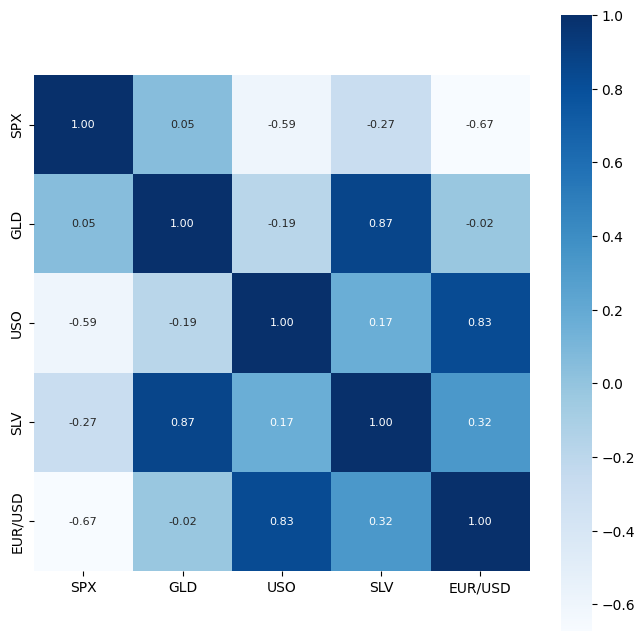

In [14]:
# constructing a heat map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [15]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


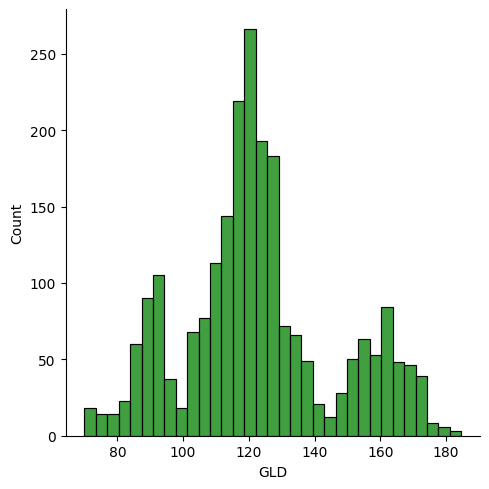

In [16]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color = 'green')

In [17]:
# Spliting the features and target

In [18]:
X = gold_data.drop(['GLD', 'Date'], axis = 1)
Y = gold_data['GLD']

In [19]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [20]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [21]:
# Spliting into Training Data & Test Data

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [23]:
X_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


In [36]:
# Model Training: Random forest regressor

In [37]:
regressor = RandomForestRegressor(n_estimators=100)

In [38]:
# training the model

In [39]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [40]:
# Model Evaluation
# prediction of test data
test_data_prediction = regressor.predict(X_test)

In [41]:
print(test_data_prediction)

[168.23699981  81.97699998 116.06899981 127.75070097 120.58820162
 154.78099805 150.31589928 126.11740057 117.36189876 126.0097005
 116.6900008  171.88750091 141.48069919 167.99099851 115.15070016
 117.66270064 139.61280335 170.2207009  159.36410303 159.90369954
 155.16829995 125.42840021 175.44669977 156.69020342 125.21930045
  93.76559969  77.55179991 120.6936004  119.02309894 167.53320032
  88.36430022 125.10099992  91.08920061 117.60810011 121.19709895
 136.59560081 115.5317012  115.55350072 147.77409943 107.42320084
 104.77510259  87.2485979  126.452301   117.56539976 153.03359878
 119.91149972 108.4175002  108.32349881  93.31440035 127.0564977
  75.25050005 113.74119941 121.31129983 111.32329937 118.80419892
 120.71049936 159.78619989 168.01400104 147.05019679  85.95519863
  94.07480034  86.76989879  90.66270013 118.90050092 126.54020042
 127.55940045 169.28160015 122.27139939 117.41139877  98.58370015
 168.13110096 143.63319876 132.41540232 121.26260224 120.98969957
 119.7090006

In [42]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)


In [43]:
print("R sqaured error : ", error_score)

R sqaured error :  0.9888208813844103


In [44]:
# compare the actual values and Predicted values
Y_test = list(Y_test)


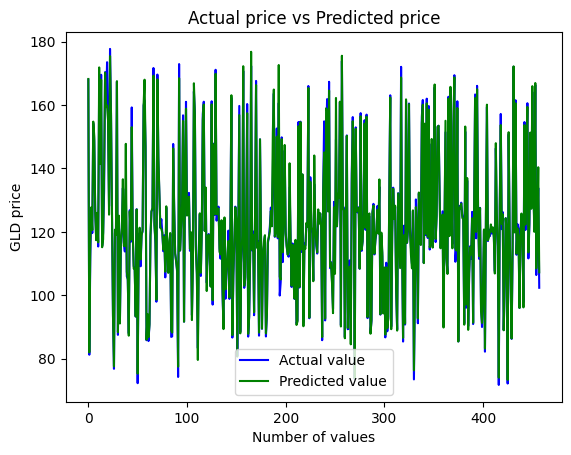

In [45]:
plt.plot(Y_test, color='blue', label = 'Actual value')
plt.plot(test_data_prediction, color='green', label = 'Predicted value')
plt.title('Actual price vs Predicted price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()